## Emotion Clustering Analysis

This notebook processes the GoEmotions dataset to cluster emotions into broader categories and visualize their distribution. The dataset is split into three parts, which are combined, processed to assign primary emotions and clusters, and then visualized.

We import pandas to handle the dataset and perform data operations.

In [1]:
import pandas as pd

This section loads the three parts of the GoEmotions dataset (goemotions_1.csv, goemotions_2.csv, goemotions_3.csv) from the original_datasets directory into separate DataFrames.

In [2]:
df1 = pd.read_csv("original_datasets\goemotions_1.csv")
df2 = pd.read_csv("original_datasets\goemotions_2.csv")
df3 = pd.read_csv("original_datasets\goemotions_3.csv")

The three DataFrames are concatenated into a single DataFrame, and the shape of the combined dataset is printed to verify the total number of rows and columns.

In [3]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined shape:", df.shape)

Combined shape: (211225, 37)


This cell defines a list of emotion columns present in the dataset, which will be used to identify the primary emotion for each row.

In [4]:
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

A function get_first_emotion is defined to assign the first emotion with a value of 1 in each row as the primary emotion. If no emotion is marked as 1, the row is labeled as 'neutral'. The result is stored in a new emotion column.

In [5]:
def get_first_emotion(row):
    for emo in emotion_columns:
        if row[emo] == 1:
            return emo
    return 'neutral'

df['emotion'] = df.apply(get_first_emotion, axis=1)

This section defines a mapping of individual emotions to broader clusters (e.g., 'happy', 'sad', 'angry', 'calm', 'anxious') to simplify analysis.

In [6]:
emotion_cluster_map = {
    "happy": [
        'admiration', 'amusement', 'approval', 'excitement', 'gratitude',
        'joy', 'love', 'optimism', 'pride'
    ],
    "sad": [
        'disappointment', 'grief', 'remorse', 'sadness'
    ],
    "angry": [
        'anger', 'annoyance', 'disapproval', 'disgust'
    ],
    "calm": [
        'caring', 'relief', 'realization', 'neutral'
    ],
    "anxious": [
        'confusion', 'curiosity', 'desire', 'embarrassment', 'fear', 'nervousness', 'surprise'
    ]
}

Each primary emotion is mapped to its corresponding cluster using the emotion_cluster_map. A new emotion_cluster column is added to the DataFrame to store the cluster labels.

In [7]:
flat_map = {}
for cluster, emotions in emotion_cluster_map.items():
    for emotion in emotions:
        flat_map[emotion] = cluster

df['emotion_cluster'] = df['emotion'].apply(lambda e: flat_map.get(e, 'unknown'))

The processed dataset, containing the text, primary emotion, and emotion cluster, is sampled for inspection and saved to a CSV file (emotions_clustered.csv) for further use.

In [8]:
print(df[['text', 'emotion', 'emotion_cluster']].sample(10))

df[['text', 'emotion', 'emotion_cluster']].to_csv("emotions_clustered.csv", index=False)
print("Final dataset saved as 'emotions_clustered.csv'")

                                                     text         emotion  \
189133                                         Not wrong.         neutral   
157666  [NAME] looks like original [NAME] and [NAME] h...         neutral   
177680  my ex's favorite thing to do on psychs was eat...         neutral   
29725   Yeah, but what if he didn't have a camera? You...         neutral   
159309  That better the case. It'll take the sting awa...        approval   
209236  Society started going downhill at exactly the ...  disappointment   
27142   And for pro-Syrian-rebel tweeting (which means...        optimism   
18473                                  He's 34 years old.        approval   
6293    (Stupid) * (how many times you think you can p...           anger   
125042                                This hurts my brain       annoyance   

       emotion_cluster  
189133            calm  
157666            calm  
177680            calm  
29725             calm  
159309           happy  
20

This section visualizes the distribution of emotion clusters using a bar plot created with matplotlib and seaborn. The plot shows the count of each emotion cluster in the dataset.

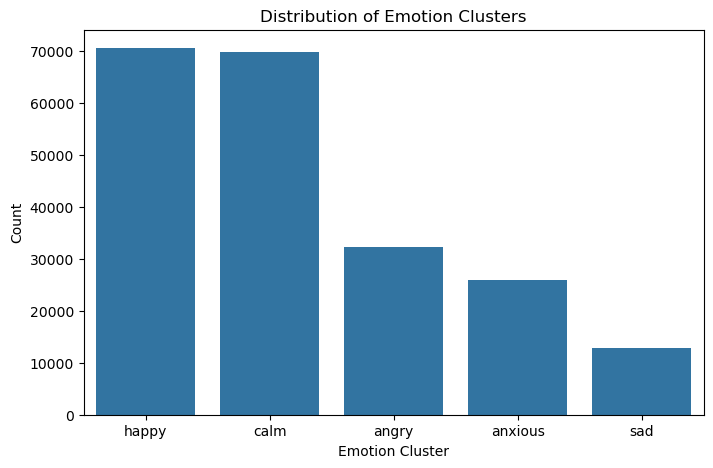

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='emotion_cluster', order=df['emotion_cluster'].value_counts().index)
plt.title("Distribution of Emotion Clusters")
plt.xlabel("Emotion Cluster")
plt.ylabel("Count")
plt.show()